In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import math as math
from matplotlib import transforms
from sklearn import preprocessing as prproc
from sklearn.decomposition import PCA

In [3]:
columns = columns = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30', 'A31', 'A32', 'A33', 'A34', 'A35', 'A36', 'A37', 'A38', 'A39', 'A40', 'Class']
data = pd.read_csv('texture.dat', sep = ",", header=None, skiprows=45, names = columns)
data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A32,A33,A34,A35,A36,A37,A38,A39,A40,Class
0,-1.223,-0.798,-0.867,-0.639,-0.545,-0.412,-0.795,-0.629,-0.547,-0.868,...,-0.766,-0.555,-0.714,-0.545,-0.587,-0.871,-0.620,-0.568,-0.607,2
1,-1.410,-1.029,-1.013,-0.895,-0.762,-0.676,-1.043,-0.851,-0.775,-1.037,...,-0.919,-0.770,-0.847,-0.663,-0.723,-1.013,-0.748,-0.698,-0.817,2
2,-1.107,-0.649,-0.629,-0.492,-0.367,-0.298,-0.682,-0.478,-0.395,-0.681,...,-0.692,-0.445,-0.588,-0.371,-0.368,-0.746,-0.457,-0.379,-0.469,2
3,-1.270,-0.855,-0.958,-0.707,-0.619,-0.469,-0.872,-0.705,-0.620,-0.988,...,-0.829,-0.719,-0.774,-0.617,-0.688,-0.937,-0.693,-0.657,-0.779,2
4,-1.331,-0.862,-0.761,-0.689,-0.498,-0.361,-0.857,-0.600,-0.496,-0.779,...,-0.861,-0.571,-0.784,-0.545,-0.562,-0.952,-0.642,-0.578,-0.648,2


In [4]:
scalerStd = prproc.StandardScaler()
for i in data.columns[:-1]:
    x = scalerStd.fit_transform(data[[i]])
    data[i] = x[0:]
data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A32,A33,A34,A35,A36,A37,A38,A39,A40,Class
0,-0.613097,-1.028195,-0.903285,-1.018106,-0.908456,-0.763383,-0.960534,-0.890625,-0.912126,-0.826953,...,-0.633416,-0.191022,-0.488950,-0.276889,0.037651,-0.557311,-0.312170,-0.223285,-0.127305,2
1,-1.532538,-2.152183,-1.369044,-2.130263,-1.828188,-1.949982,-2.198981,-1.895075,-1.878099,-1.344190,...,-1.442843,-0.841793,-1.411868,-0.891013,-0.760650,-1.422686,-0.918432,-0.868562,-0.806737,2
2,-0.042749,-0.303198,-0.144034,-0.379484,-0.154022,-0.250988,-0.396242,-0.207418,-0.268144,-0.254625,...,-0.241929,0.141931,0.385394,0.628684,1.323151,0.204462,0.459866,0.714849,0.319178,2
3,-0.844187,-1.305543,-1.193587,-1.313523,-1.222098,-1.019580,-1.345052,-1.234491,-1.221406,-1.194222,...,-0.966710,-0.687424,-0.905304,-0.651609,-0.555205,-0.959527,-0.657929,-0.665051,-0.683792,2
4,-1.144111,-1.339603,-0.565131,-1.235324,-0.709252,-0.534153,-1.270146,-0.759413,-0.696053,-0.554562,...,-1.136002,-0.239451,-0.974696,-0.276889,0.184398,-1.050940,-0.416372,-0.272921,-0.259956,2


In [5]:
pca = PCA(n_components = 40)

table_train = pca.fit_transform(data[:-1])

cov = pca.get_covariance()
[en, ev] = np.linalg.eig(cov)
print(en)
print(ev)

explained_var_ratio = pca.explained_variance_ratio_
print(explained_var_ratio)

[ 3.34323076e+01  1.22053967e+01  3.65115263e+00  2.22623193e+00
  1.63300539e+00  5.30774771e-01  3.57093525e-01  1.88485624e-01
  1.50524604e-01  1.09974582e-01  8.03105218e-02  6.52946515e-02
  4.73976493e-02  3.80632702e-02  3.19432906e-02  2.98916724e-02
  2.35790348e-02  1.67976838e-02  1.57703826e-02  1.22981049e-02
  1.06751915e-02  7.84685269e-03  7.06077300e-03  6.72692919e-03
  5.30552108e-03  4.95766245e-03  4.60585486e-03  3.61141849e-03
  3.32253192e-03  3.03494664e-03  2.57972163e-03  2.06761193e-03
  1.93371192e-03  1.50676117e-03  6.29950523e-04  7.39233802e-04
  9.54569706e-04  9.66761762e-04  1.38356835e-17 -3.92773694e-16
  2.13303362e-19]
[[ 1.05805415e-01 -4.86631024e-02  3.94602602e-01 ... -6.27277873e-02
   8.65027944e-01  1.55886841e-01]
 [ 1.48884210e-01 -4.72871381e-02  3.92814785e-02 ...  3.88339770e-14
  -5.77919684e-14 -1.78456977e-14]
 [ 1.42518640e-01 -1.12015475e-01 -1.63772693e-01 ... -1.07523114e-14
   1.07720035e-13  1.84747699e-14]
 ...
 [ 1.5492604

In [6]:
X = data.drop('Class', axis=1)
y = data['Class']

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40)

In [8]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [9]:
y_pred = classifier.predict(X_test)

In [10]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[176   9   7   0   1   7   2   0   0   0   0]
 [  3 186   0   0   0   3   7   1   0   0   2]
 [  7   1 190   0   1   0   0   0   0   0   0]
 [  1   1   0 177   0   2   0   5   0   0   1]
 [  0   0   0   0 195   0   0   0   0   0   0]
 [  1   1   0   4   0 174   4  20   0   1   3]
 [ 13   5   0   0   1  13 171   4   0   0   1]
 [  0   1   0   5   0  10   0 185   0   0   1]
 [  0   0   0   0   0   0   0   0 200   0   0]
 [  0   0   0   0   0   0   0   0   0 198   1]
 [  3   4   0   2   0  13   0   2   0   1 173]]
              precision    recall  f1-score   support

           2       0.86      0.87      0.87       202
           3       0.89      0.92      0.91       202
           4       0.96      0.95      0.96       199
           6       0.94      0.95      0.94       187
           7       0.98      1.00      0.99       195
           8       0.78      0.84      0.81       208
           9       0.93      0.82      0.87       208
          10       0.85      0.92      0.88      

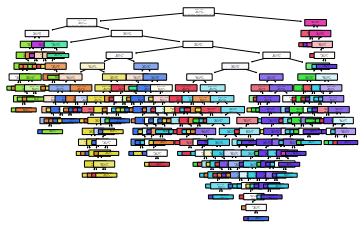

In [11]:
from sklearn import tree
tree.plot_tree(classifier, filled = True, rounded = True)
plt.show()